<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/112BDA%E6%9C%9F%E4%B8%AD%E5%A0%B1%E5%91%8A%E7%A4%BA%E7%AF%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 巨量資料期中考專題：開放資料探索與分析

**目標：**
學習如何從公開資料源獲取資料，將其轉化成 pandas DataFrame 進行處理和分析，並進行描述性統計分析。您將通過這個專案學習資料科學的基本步驟，包括資料清洗、數據探索、和初步的資料分析。

**專題要求：**

1. **資料來源**：
   - 自行選擇一個開放資料集，或收集自己的數據集。
   - 確保資料集至少包含 1000 個觀測值和 5 個變數(欄位)。

2. **資料轉化**：
   - 將選擇的資料集轉化為 pandas DataFrame。
   - 進行資料清洗，包括處理缺失值、異常值等。

3. **描述統計分析**：
   - 使用 pandas 提供的函數，如 `describe()`, `mean()`, `median()`, `std()` 等進行描述性統計。
   - 根據資料特性，選擇合適的圖表展示數據分佈，如直方圖、箱型圖等。

4. **資料解釋與分析目的**：
   - 解釋選擇該資料集的動機。
   - 說明資料集中每個欄位的意義。
   - 討論後續想要進行的分析，以及這樣分析的目的是什麼。

**提交物**：
- 一份包含資料分析代碼的 Colab (Jupyter Notebook) 文件。
- Colab 文件內容應包含解釋資料來源、分析目的、欄位意義和初步發現。
- （可選）一份簡短的演示文件，用於期中考專題展示。

**評分標準**：
- 資料來源的適當性和資料集的複雜度（20%）。
- 資料轉化和清洗的完整性（30%）。
- 描述統計分析的深度和準確性（20%）。
- 資料解釋與分析目的的清晰度（20%）。
- 報告和演示的質量（10%）。

請試著藉此接觸實際的資料集，您將能夠展示他們的分析能力並理解資料背後的故事。

以下以開放資料 "PM2.5" 的分析計劃概述：

### 資料來源與選擇動機
- 為了分析空氣品質對健康的影響，我們選擇了 PM2.5 的數據集。PM2.5 是細懸浮微粒，當其濃度過高時對人類健康造成極大影響，包括呼吸系統疾病和心血管疾病等。這些數據通常由政府或相關環境監測機構公開發布，具有高度的時效性與公信力。
- 開放資料資料集: https://data.gov.tw/dataset/34827

### 資料集結構
- site(測站名稱)
- county(縣市名稱)
- pm25(細懸浮微粒濃度)
- datacreationdate(資料建置日期)
- itemunit(測項單位)

### 資料轉化與清洗
1. 將資料下載並載入到 pandas DataFrame。
2. 檢查並處理缺失值—例如，用平均值或中位數填充。
3. 處理異常值—確認數據範圍合理性，如 PM2.5 濃度不可能為負。
4. 轉化日期時間格式，以利於時間序列分析。

### 描述統計分析
- 使用 `describe()` 函數來獲得每個變量的概述（均值、標準差、四分位數等）。
- 繪製直方圖和箱型圖來觀察 PM2.5 濃度的分佈及其隨時間的變化趨勢。

### 分析目的與後續計劃
- **分析目的**：評估 PM2.5 濃度的季節性變化和日變化，探索溫度和濕度與 PM2.5 濃度之間的關聯。
- **後續分析**：應用統計測試來評估不同變量之間的相關性，可能進一步應用時間序列分析或建立預測模型。

這份計劃能夠幫助你準備一份完整的數據分析報告，並在期中考專題中展示你的分析技能。如果你需要進一步的幫助或具體的分析代碼範例，隨時可以告訴我！

In [5]:
# prompt: 使用https://data.gov.tw/dataset/34827資料變成dataframe

import pandas as pd

url = 'https://data.moenv.gov.tw/api/v2/aqx_p_02?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=datacreationdate%20desc&format=CSV'

df = pd.read_csv(url, encoding='utf-8')

# Display the DataFrame
df


,site,county,pm25,datacreationdate,itemunit
0,大城,彰化縣,26,2024-04-14 12:00,μg/m3
1,富貴角,新北市,17,2024-04-14 12:00,μg/m3
2,麥寮,雲林縣,25,2024-04-14 12:00,μg/m3
3,關山,臺東縣,2,2024-04-14 12:00,μg/m3
4,馬公,澎湖縣,19,2024-04-14 12:00,μg/m3
...,...,...,...,...,...
73,土城,新北市,39,2024-04-14 12:00,μg/m3
74,新店,新北市,38,2024-04-14 12:00,μg/m3
75,萬里,新北市,25,2024-04-14 12:00,μg/m3
76,汐止,新北市,28,2024-04-14 12:00,μg/m3


from matplotlib import pyplot as plt
df['pm25'].plot(kind='hist', bins=20, title='pm25')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datacreationdate']
  ys = series['pm25']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datacreationdate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datacreationdate')
_ = plt.ylabel('pm25')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datacreationdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datacreationdate'}, axis=1)
              .sort_values('datacreationdate', ascending=True))
  xs = counted['datacreationdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datacreationdate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datacreationdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['pm25']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('pm25')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['pm25'].plot(kind='line', figsize=(8, 4), title='pm25')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   site              78 non-null     object
 1   county            78 non-null     object
 2   pm25              78 non-null     int64 
 3   datacreationdate  78 non-null     object
 4   itemunit          78 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


In [7]:
df.describe()

,pm25
count,78.000000
mean,20.794872
std,11.139446
min,0.000000
25%,10.000000
50%,23.500000
75%,30.000000
max,40.000000


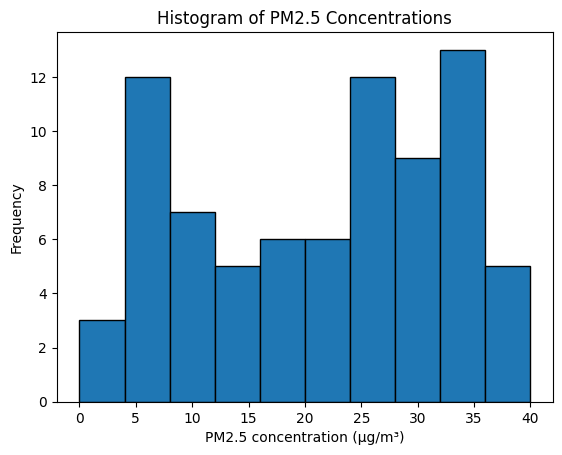

In [9]:
# prompt: 繪製直方圖和箱型圖來觀察 PM2.5 濃度的分佈及其隨時間的變化趨勢。

import pandas as pd
import matplotlib.pyplot as plt

# Histogram of PM2.5 concentrations
plt.hist(df['pm25'], bins=10, edgecolor='black')
plt.xlabel('PM2.5 concentration (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 Concentrations')
plt.show()




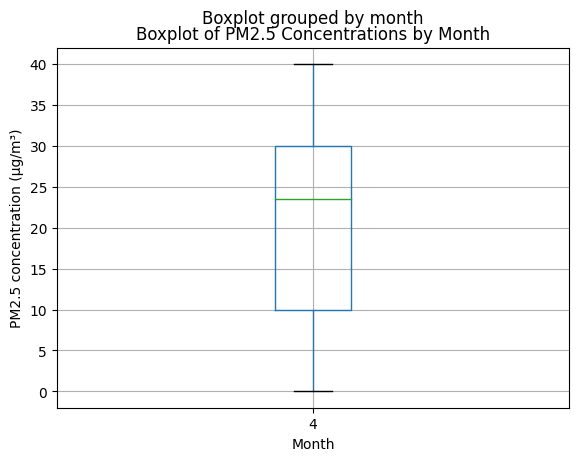

In [11]:
# prompt: 繪製箱型圖來觀察 PM2.5 濃度的分佈及其隨時間的變化趨勢。

import pandas as pd
import matplotlib.pyplot as plt
# Boxplot of PM2.5 concentrations by month
df['month'] = pd.to_datetime(df['datacreationdate']).dt.month
df.boxplot('pm25', by='month')
plt.xlabel('Month')
plt.ylabel('PM2.5 concentration (µg/m³)')
plt.title('Boxplot of PM2.5 Concentrations by Month')
plt.show()
